# Выбор локации для скважины добывающей компании «ГлавРосГосНефть»

# Описание проекта

Нам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны.Мы работаем в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.


Нам предоставлены пробы нефти в трёх регионах: в каждом 100 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо просторить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль, а также проанализировать возможную прибыль и риски техникой Bootstrap.

# Цель проекта

Построить модель для определения региона, где добыча принесёт наибольшую прибыль.

# Ход выполнения проекта

- Шаг 1. Откроем файл с данными и изучим общую информацию
     - 1.1. путь к файлу: /datasets/geo_data_0.csv;
     - 1.2. путь к файлу: /datasets/geo_data_1.csv;
     - 1.3. путь к файлу: /datasets/geo_data_2.csv;
     - 1.4. изучим общую информацию;
     - 1.5. подготовим данные к обработке;
     - 1.6. напишем вывод по шагу 1.
- Шаг 2. Обучим и проверим модель для каждого региона:
     - 2.1. Разобьем данные на обучающую и валидационную выборки в соотношении 75:25.
     - 2.2. Обучим модель и сделаем предсказания на валидационной выборке.
     - 2.3. Сохраним предсказания и правильные ответы на валидационной выборке.
     - 2.4. Напечатаем на экране средний запас предсказанного сырья и RMSE модели.
     - 2.5. Проанализируем результаты и напишем выводы по шагу 2.
- Шаг 3. Подготовимся к расчёту прибыли:
     - 3.1. Все ключевые значения для расчётов сохраним в отдельных переменных.
     - 3.2. Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе. 
     - 3.3. Напишем выводы по шагу подготовки расчёта прибыли.
- Шаг 4. Расчет прибыли и рисков
     - 4.1. Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
         - Выберем скважины с максимальными значениями предсказаний. 
         - Проссумируем целевое значение объёма сырья, соответствующее этим предсказаниям.
         - Рассчитаем прибыль для полученного объёма сырья.
         - Напишем промежуточный вывод.
     - 4.2. Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
     - 4.3. Посчитаем риски и прибыль для каждого региона:
         - Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
     - 4.4. Напишем выводы: предложим регион для разработки скважин и обоснуем выбор.
- Шаг 5. Напишем общий вывод по проекту и дадим реккомендации
     - 5.1. Напишем общий вывод по проекту.

Шаги для выбора локации:
- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.    

# Дополнительная информация

**Описание данных**

id — уникальный идентификатор скважины;
f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
product — объём запасов в скважине (тыс. баррелей).

**Условия задачи**

- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

**Данные геологоразведки трёх регионов находятся в файлах:**
/datasets/geo_data_0.csv.
/datasets/geo_data_1.csv.
/datasets/geo_data_2.csv.

Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
! pip install missingno
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
try:
    try:
        #локальная версия
        df_0 = pd.read_csv('datasets\geo_data_0.csv')
        df_1 = pd.read_csv('datasets\geo_data_1.csv')
        df_2 = pd.read_csv('datasets\geo_data_2.csv')
    except:
        #сетевая версия
        df_0 = pd.read_csv('/datasets/geo_data_0.csv')
        df_1 = pd.read_csv('/datasets/geo_data_1.csv')
        df_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    print('Не удалось прочесть файл. Возможно, был указан не верный путь.')

In [3]:
#посмотрим на 3 доступных нам датасета
df_0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [4]:
df_1

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [5]:
df_2

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [6]:
#посмотрим общую информацию о датасете
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


<AxesSubplot:>

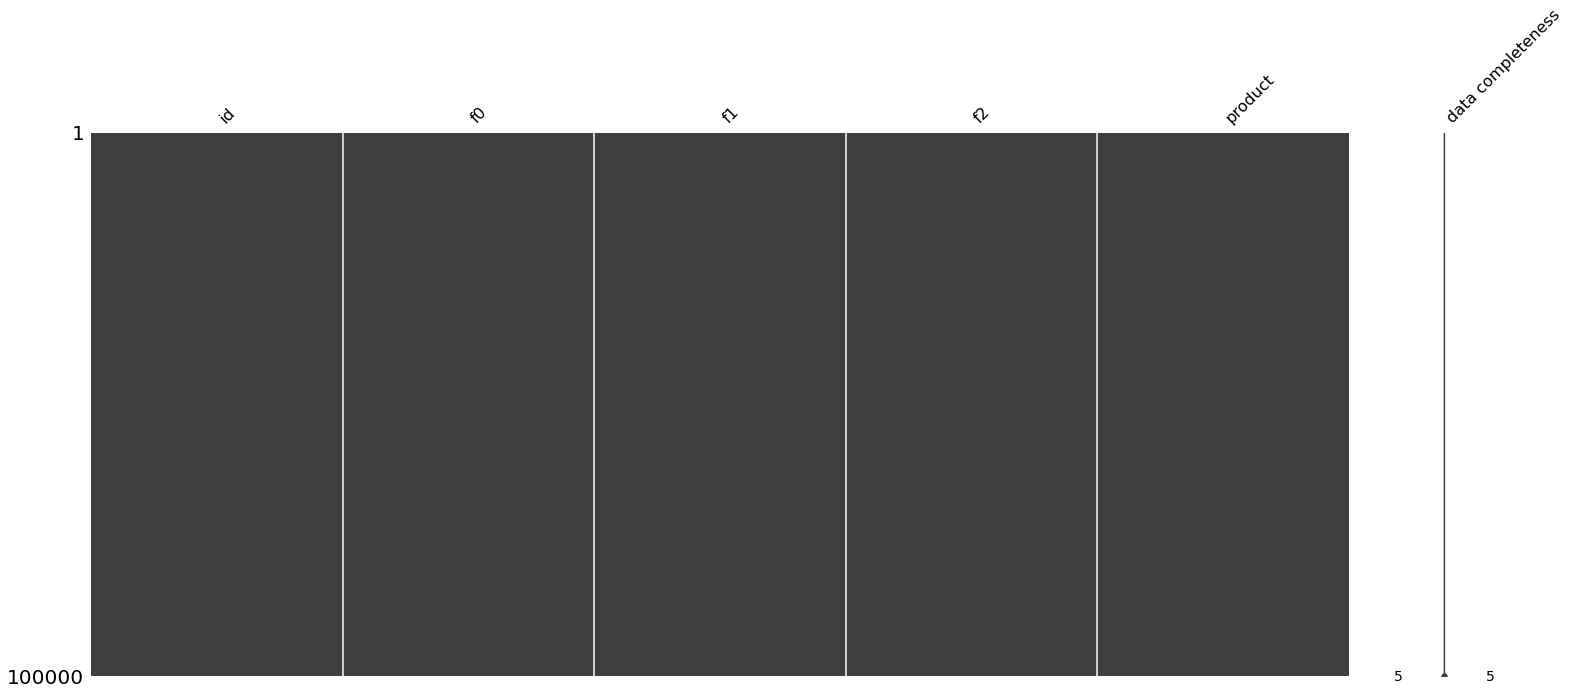

In [9]:
#визуализируем целостность набора данных, для дальнейшей их обработки
msno.matrix(df_0, labels=True)

<AxesSubplot:>

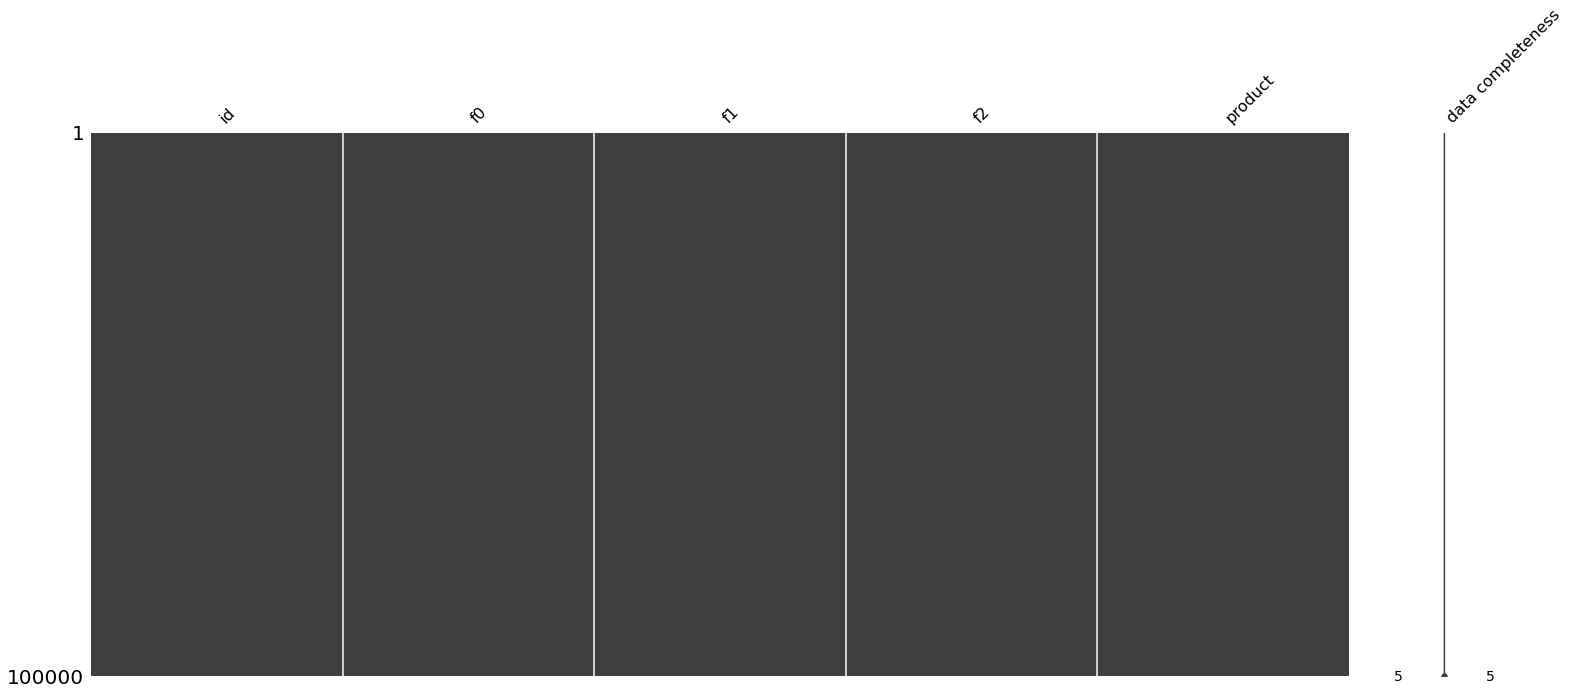

In [10]:
msno.matrix(df_1, labels=True)

<AxesSubplot:>

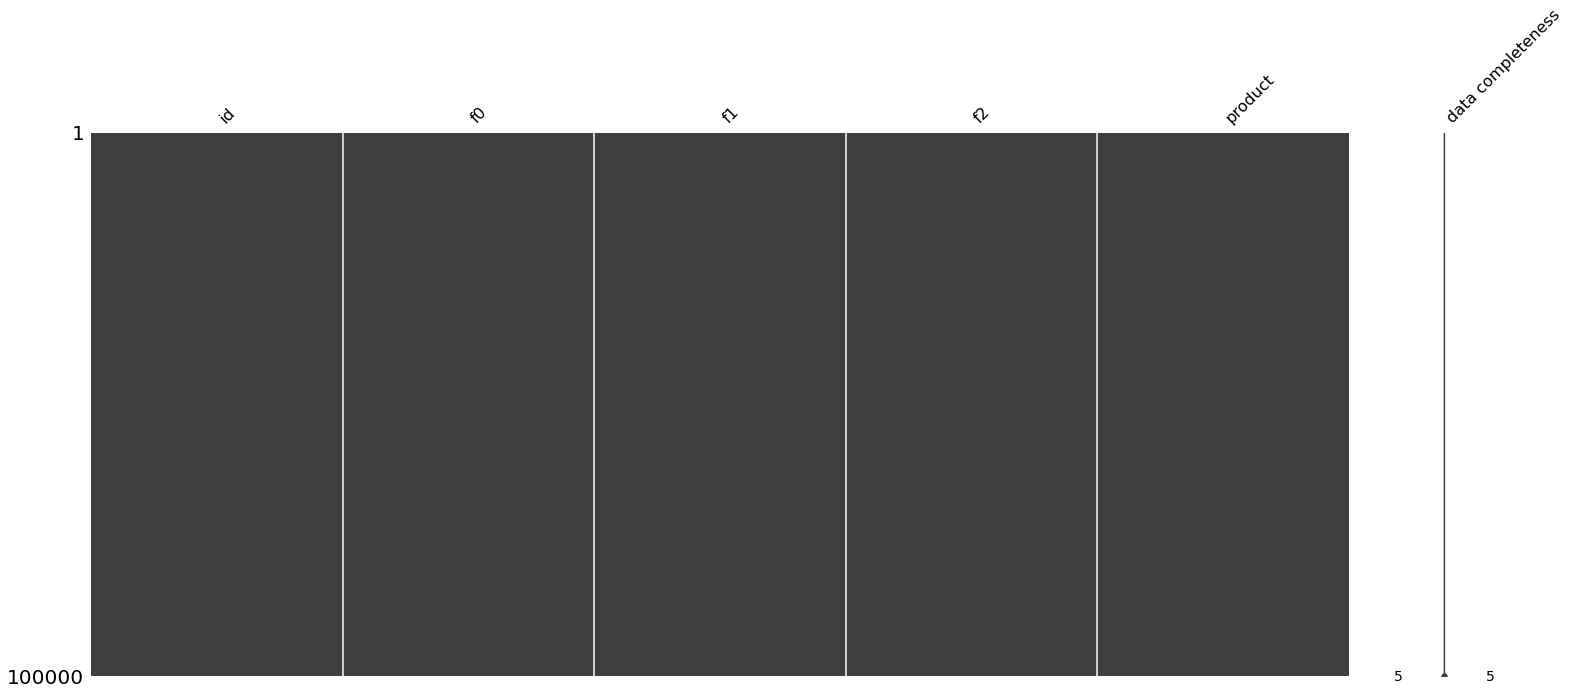

In [11]:
msno.matrix(df_2, labels=True)

**В датасетах типы данных менять не нужно, данные не имеют пропусков, названия столбцов имеют корректный вид. В каждом из 3 регионов, как и заявлялось 100000 строк (месторождений).**

In [12]:
print(f'Размерность 0 датафрейма до удаления дубликатов, столбцов (строк и столбцов соответственно):', df_0.shape)
print()

Размерность 0 датафрейма до удаления дубликатов, столбцов (строк и столбцов соответственно): (100000, 5)



In [13]:
print(f'Размерность 1 датафрейма до удаления дубликатов, столбцов (строк и столбцов соответственно):', df_1.shape)
print()

Размерность 1 датафрейма до удаления дубликатов, столбцов (строк и столбцов соответственно): (100000, 5)



In [14]:
print(f'Размерность 2 датафрейма до удаления дубликатов, столбцов (строк и столбцов соответственно):', df_2.shape)
print()

Размерность 2 датафрейма до удаления дубликатов, столбцов (строк и столбцов соответственно): (100000, 5)



In [15]:
#проверим количество явных дубликатов
df_0['id'].duplicated().sum()

10

In [16]:
#выведем их на экран
print(df_0[df_0['id'].duplicated()])

          id        f0        f1         f2     product
7530   HZww2  1.061194 -0.373969  10.430210  158.828695
41724  bxg6G -0.823752  0.546319   3.630479   93.007798
51970  A5aEY -0.180335  0.935548  -2.094773   33.020205
63593  QcMuo  0.635635 -0.473422   0.862670   64.578675
66136  74z30  1.084962 -0.312358   6.990771  127.643327
69163  AGS9W -0.933795  0.116194  -3.655896   19.230453
75715  Tdehs  0.112079  0.430296   3.218993   60.964018
90815  fiKDv  0.049883  0.841313   6.394613  137.346586
92341  TtcGQ  0.110711  1.022689   0.911381  101.318008
97785  bsk9y  0.378429  0.005837   0.160827  160.637302


In [17]:
#проверим количество явных дубликатов
df_1['id'].duplicated().sum()

4

In [18]:
print(df_1[df_1['id'].duplicated()])

          id         f0        f1        f2     product
41906  LHZR0  -8.989672 -4.286607  2.009139   57.085625
82178  bfPNe  -6.202799 -4.820045  2.995107   84.038886
82873  wt4Uk  10.259972 -9.376355  4.994297  134.766305
84461  5ltQ6  18.213839  2.191999  3.993869  107.813044


In [19]:
#проверим количество явных дубликатов
df_2['id'].duplicated().sum()

4

In [20]:
print(df_2[df_2['id'].duplicated()])

          id        f0        f1        f2     product
43233  xCHr8 -0.847066  2.101796  5.597130  184.388641
49564  VF7Jo -0.883115  0.560537  0.723601  136.233420
55967  KUPhW  1.211150  3.176408  5.543540  132.831802
95090  Vcm5J  2.587702  1.986875  2.482245   92.327572


In [21]:
#рассчитаем метрики для столбцов с числовыми значениями
df_0.describe() 

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [22]:
df_1.describe() 

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [23]:
df_2.describe() 

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [24]:
#Видно, что некоторые строки - дубликаты имеют достаточно большие значения в столбце product. 
#оставим только те строки-дубликаты, которые имеют максимальное значение по столбцу product.

df_0 = df_0.loc[df_0.groupby('id')['product'].idxmax()]

In [25]:
df_0['id'].duplicated().sum()

0

In [26]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99990 entries, 85486 to 48207
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99990 non-null  object 
 1   f0       99990 non-null  float64
 2   f1       99990 non-null  float64
 3   f2       99990 non-null  float64
 4   product  99990 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


In [27]:
df_1 = df_1.loc[df_1.groupby('id')['product'].idxmax()]

In [28]:
df_2 = df_2.loc[df_2.groupby('id')['product'].idxmax()]

In [29]:
#Удалим из датасетов столбцы id, т.к. обозначения скважин не влияют на целевой признак product:

df_0 = df_0.drop('id', axis=1)
df_1 = df_1.drop('id', axis=1)
df_2 = df_2.drop('id', axis=1)

In [30]:
#проверим размерности датасетов после удаления дубликатов
print(f'Размерность 0 датафрейма после удаления дубликатов, столбцов (строк и столбцов соответственно):', df_0.shape)
print(f'Размерность 1 датафрейма после удаления дубликатов, столбцов (строк и столбцов соответственно):', df_1.shape)
print(f'Размерность 2 датафрейма после до удаления дубликатов, столбцов (строк и столбцов соответственно):', df_2.shape)

Размерность 0 датафрейма после удаления дубликатов, столбцов (строк и столбцов соответственно): (99990, 4)
Размерность 1 датафрейма после удаления дубликатов, столбцов (строк и столбцов соответственно): (99996, 4)
Размерность 2 датафрейма после до удаления дубликатов, столбцов (строк и столбцов соответственно): (99996, 4)


**Вывод по шагу 1:**

**Таким образом было удалено 18 дубликатов и оставлены строки с максимальным значением по столбцу product. Датасеты готовы для дальнейших исследований и построения моделей обучения.**

## Обучение и проверка модели

In [31]:
#Обучим и проверим модель для каждого региона:

### Разобьем данные на обучающую и валидационную выборки в соотношении 75:25.

In [32]:
def solo_split(df):

    #Разобьем данные на две выборки (обучающую, валидационную выборки).
    #Выделим в отдельные переменные фичи и целевой признак
    target = df['product']
    features = df.drop(['product'], axis=1)

    #Разделим данные на обучающую(75%), валидационную(25%) выборки
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    
    #Провреим размер каждой выборки
    print('Размер обучающей выборки:', features_train.shape[0])
    print('Размер валидационной выборки:', features_valid.shape[0])

    print()

    # Выведем обучающие данные
    print('Обучающие данные:')
    print(features_train)

    print()

    # Выведем валидационные данные
    print('Валидационные данные:')
    print(features_valid)

    print()

    # Выведем целевой признак обучающей выборки
    print('Целевой признак обучающей выборки:')
    print(target_train)

    print()

    # Выведем целевой признак валидационной выборки
    print('Целевой признак валидационной выборки:')
    print(target_valid)
    
    return features_train, features_valid, target_train, target_valid


In [33]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = solo_split(df_0)

Размер обучающей выборки: 74992
Размер валидационной выборки: 24998

Обучающие данные:
             f0        f1        f2
34586 -0.854624  0.648931  0.918979
84626  0.506776  0.903766  9.372056
85171  0.929826 -0.276882  3.040144
90434  0.619362 -0.536860 -0.578965
59391 -1.005459  0.400291  6.430260
...         ...       ...       ...
85645  0.732526 -0.368536  0.872020
64437  1.859445 -0.077640 -0.949147
61121 -0.293869  0.938646  6.524649
39986  0.259263 -0.298221  1.357552
46490  0.208616  0.109618  2.565195

[74992 rows x 3 columns]

Валидационные данные:
             f0        f1        f2
54274  1.875305 -0.088220  2.906971
34022  2.109148  0.229769 -0.162784
67875  0.250098 -0.223214  0.251503
22364  1.506250 -0.323977  4.195752
23208 -0.960455  0.589049  2.585819
...         ...       ...       ...
38036  0.491137  0.685279  1.904904
15658  0.378332  0.848977  4.341206
82300  0.851017 -0.297936 -3.846108
72277  0.779056  0.434927 -0.005849
91703 -0.104511  1.132944  2.007904


In [34]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = solo_split(df_1)

Размер обучающей выборки: 74997
Размер валидационной выборки: 24999

Обучающие данные:
              f0         f1        f2
20656  -9.402199  -9.039856  1.001502
20618   5.719051   0.258560  2.997325
27589   2.613868  -4.689252  4.997197
74660  -4.854275  -7.828654  1.997265
63272   6.036799   3.765745 -0.004413
...          ...        ...       ...
75816   2.324959  -6.031647  2.000901
48860  -5.712428 -13.980440  0.998991
8390    7.752659  -0.514318  5.000161
30468  -4.864043  -9.699840  1.996109
94640 -10.310237  -7.398842  4.000888

[74997 rows x 3 columns]

Валидационные данные:
              f0         f1        f2
98775   2.101058 -15.359663  0.000647
30981   6.409385   2.585123 -0.003164
58056  -0.541448   0.485656  1.999177
8025    7.814599  -3.454294  1.988938
77424  11.274889  -6.923969  1.005349
...          ...        ...       ...
12473  22.768995   1.149003  5.002738
15912   3.014463   0.131052  4.005872
97469  12.465530   8.106178  1.994554
83769  -5.384146  -3.040909 

In [35]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = solo_split(df_2)

Размер обучающей выборки: 74997
Размер валидационной выборки: 24999

Обучающие данные:
             f0        f1        f2
86628 -0.782372 -1.771512  3.106783
55767  1.953960 -0.834384  3.352354
23862  5.871165  0.714037  2.129213
33447  0.055854 -1.387183  1.512609
79712 -1.708728 -0.146710  3.523419
...         ...       ...       ...
62709 -3.435934 -1.855537  4.451967
4312  -0.490523 -2.092290  3.391203
18972 -0.791008  2.245977  7.026311
85760  1.101659  2.921162  7.140167
70473  1.629957 -0.852655  3.743740

[74997 rows x 3 columns]

Валидационные данные:
             f0        f1        f2
36134 -1.590159 -0.987171  4.416721
30403  2.327903 -0.746044  3.669648
32794  2.816231  0.434433 -2.528651
89798  0.878318 -2.081427  4.173592
44896  0.952651  0.131776  4.357391
...         ...       ...       ...
72382  1.054002  0.577943 -3.116853
38389 -0.852102  1.469485 -3.911568
75315 -0.076103  1.948004  8.134563
33364  0.593695 -1.120748  7.273632
28898  1.759534 -0.173084 -0.509316


### Обучим модель и сделаем предсказания на валидационной выборке.


In [36]:
#обучим модель и выведем среднеквадратичную ошибку для 0ой модели
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)

LinearRegression()

In [37]:
#обучим модель и выведем среднеквадратичную ошибку для 1ой модели
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)

LinearRegression()

In [38]:
#обучим модель и выведем среднеквадратичную ошибку для 2ой модели
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)

LinearRegression()

### Сохраним предсказания и правильные ответы на валидационной выборке.


In [39]:
predicted_target_0 = model_0.predict(features_valid_0)

In [40]:
predicted_target_1 = model_1.predict(features_valid_1)

In [41]:
predicted_target_2 = model_2.predict(features_valid_2)

### Напечатаем на экране средний запас предсказанного сырья и RMSE модели.


In [42]:
print('Средний запас предсказанного сырья 0го датафрейма-', predicted_target_0.mean())
print('RMSE -', mean_squared_error(target_valid_0, predicted_target_0)**0.5)

Средний запас предсказанного сырья 0го датафрейма- 92.46872715215066
RMSE - 37.70050687937696


In [43]:
print('Средний запас предсказанного сырья 1го датафрейма-', predicted_target_1.mean())
print('RMSE -', mean_squared_error(target_valid_1, predicted_target_1)**0.5)

Средний запас предсказанного сырья 1го датафрейма- 68.99166298712306
RMSE - 0.8903348491780877


In [44]:
print('Средний запас предсказанного сырья 2го датафрейма-', predicted_target_2.mean())
print('RMSE -', mean_squared_error(target_valid_2, predicted_target_2)**0.5)

Средний запас предсказанного сырья 2го датафрейма- 95.02470143190173
RMSE - 40.18232078332373


### Проанализируем результаты и напишем выводы по шагу 2.

**Вывод по шагу 2:**

    В этом шаге мы написали функцию, которая разбивает данные каждого датафрейма на обучающую и валидационную выборки в соотношении 75:25, после чего рассчитали для каждого датафрейма средний запас предсказанного сырья и RSME. Самое низкое значение среднеквадратической ошибки (RSME) у датафрейма под номером 1, при этом предсказанные запасы значительно выше в датафреймах 0 и 2.

## Подготовка к расчёту прибыли

- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

- Бюджет на разработку скважин в регионе — 10 млрд рублей.

- При нынешних ценах один баррель сырья приносит 450 рублей дохода.
     
- Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

### Все ключевые значения для расчётов сохраним в отдельных переменных.

In [45]:
#прибыль расчитывается по формуле:
#прибыль = валовая прибыль - операционные расходы
#зададим основные параметры через переменные
budget = 10*(10**9) #10 000 000 000 рублей
chosen_points = 500 #500 точек будет исследовано при разведке региона
best_points = 200 #200 лучших точек для разработки
price_per_barrel = 450*(10**3) #доход с единицы продукта, за 1000 баррель

### Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе.

In [46]:
average_profit_pp = budget / best_points
print(f'Средняя прибыль на лучшие точки - {average_profit_pp} рублей')
average_oil_best_point = average_profit_pp / price_per_barrel
print(f'Средний объем нефти на лучшую точку - {round(average_oil_best_point,2)} баррелей')
average_oil_region = budget / price_per_barrel
print(f'Средний объем нефти на регион - {round(average_oil_region,2)} баррелей')

Средняя прибыль на лучшие точки - 50000000.0 рублей
Средний объем нефти на лучшую точку - 111.11 баррелей
Средний объем нефти на регион - 22222.22 баррелей


In [47]:
#фактический средний запас нефти в нулевом регионе на одну скважину
average_oil_df_0 = df_0['product'].mean()
print(f'{round(average_oil_df_0,2)} баррелей на 1 скважину в нулевом регионе')
#фактический средний запас нефти в первом регионе на одну скважину
average_oil_df_1 = df_1['product'].mean()
print(f'{round(average_oil_df_1,2)} баррелей на 1 скважину в первом регионе')
#фактический средний запас нефти во втором регионе на одну скважину
average_oil_df_2 = df_2['product'].mean()
print(f'{round(average_oil_df_2,2)} баррелей на 1 скважину во втором регионе')

92.5 баррелей на 1 скважину в нулевом регионе
68.83 баррелей на 1 скважину в первом регионе
95.0 баррелей на 1 скважину во втором регионе


### Напишем выводы по шагу подготовки расчёта прибыли.

**Вывод по шагу 3:**

- Средняя расчетная прибыль на лучшие месторождения должна быть не меньше 50 000 000 рублей.
- Средний расчетный объем нефти на лучшую точку должен быть не меньше 111.11 баррелей.
- Средний объем нефти на регион должен составлять не менее 22222.22 баррелей.
- Фактический средний объем нефти в регионах составил: 
    - 92.5 баррелей на 1 скважину в нулевом регионе
    - 68.83 баррелей на 1 скважину в первом регионе
    - 95.0 баррелей на 1 скважину во втором регионе

Как видно средние фактические показатели на одну точку выше всего в нулевом и втором регионах, они ближе всего к расчетному показателю объем нефти на лучшую точку - 111.11 баррелей.

## Расчёт прибыли и рисков 

### Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

In [48]:
# Функция для расчета прибыли на 500 разведанных точек.
def func_profit(target, probabilities, count):
    #сортируем записи
    probs_sorted = probabilities.sort_values(ascending=False)
    #находим скважины с максимальными значениями предсказаний (обрезаем признаки по длине равными count)
    selected = target[probs_sorted.index][:count]
    #проссумируем целевое значение объёма сырья, соответствующее этим предсказаниям и 
    #рассчитаем прибыль для полученного объема сырья
    return price_per_barrel * selected.sum() - budget

**Функция отбирает count (200) лучших скважин в регионе по объему нефти, затем суммирует значения объемов и рассчитывает прибыль исходя из ранее заданных параметров стоимости единицы продукции.**

### Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

In [49]:
# Функция для применения техники Bootstrap с 1000 выборокам
state = np.random.RandomState(12345)
def bootstrap(target, probabilities):
    values=[]
    count_lost = 0
    for i in range(1000):
        target_sample = target.sample(n=chosen_points, replace=True, random_state=state)
        probs_sample = probabilities[target_sample.index]
        profit = func_profit(target, probs_sample, best_points)
        if profit < 0:
            count_lost +=1
        values.append(profit)
    
    #Посчитаем риски и прибыль для региона:
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    average = values.mean()
    risk = count_lost / 1000
    return average, lower, upper, risk

In [50]:
#напишем функцию создающую сводную таблицу df
def df_frame_transform(target, predicted):
    
    data = {'real_product' : target,
            'predicted_product' : predicted
           }
    data_frame = pd.DataFrame(data, columns = ['real_product', 'predicted_product'])
    
    return data_frame

### Посчитаем риски и прибыль для каждого региона:

In [51]:
#создадим сводные таблицы по каждому региону
df_frame_0 = df_frame_transform(target_valid_0, predicted_target_0)
df_frame_1 = df_frame_transform(target_valid_1, predicted_target_1)
df_frame_2 = df_frame_transform(target_valid_2, predicted_target_2)

In [52]:
#данные по 0 региону
average_0, lower_0, upper_0, risk_0 = bootstrap(df_frame_0['real_product'], df_frame_0['predicted_product'], )
print('Данные по нулевому региону.')
print(f'Средняя прибыль по региону = {int(average_0)} тыс.руб.')
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_0, upper_0))
print('Процент риска {:.2%}'.format(risk_0))

Данные по нулевому региону.
Средняя прибыль по региону = 424447906 тыс.руб.
95% доверительный интервал от -93515113.00 до 931076804.17 тыс.руб.
Процент риска 4.90%


In [53]:
#данные по 1 региону
average_1, lower_1, upper_1, risk_1 = bootstrap(df_frame_1['real_product'], df_frame_1['predicted_product'], )
print('Данные по первому региону.')
print(f'Средняя прибыль по региону = {int(average_1)} тыс.руб.')
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_1, upper_1))
print('Процент риска {:.2%}'.format(risk_1))

Данные по первому региону.
Средняя прибыль по региону = 464360912 тыс.руб.
95% доверительный интервал от 41718333.21 до 928663073.99 тыс.руб.
Процент риска 1.30%


In [54]:
#данные по 2 региону
average_2, lower_2, upper_2, risk_2 = bootstrap(df_frame_2['real_product'], df_frame_2['predicted_product'], )
print('Данные по второму региону.')
print(f'Средняя прибыль по региону = {int(average_2)} тыс.руб.')
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_2, upper_2))
print('Процент риска {:.2%}'.format(risk_2))

Данные по второму региону.
Средняя прибыль по региону = 325642474 тыс.руб.
95% доверительный интервал от -173318136.01 до 884008976.44 тыс.руб.
Процент риска 10.60%


### Напишем выводы: предложим регион для разработки скважин и обоснуем выбор.

**Вывод по шагу 4:**

Написанные функции позволяют вычислить среднюю прибыль по каждому региону с 95% доверительным интервалом.

При том, что фактический средний объем нефти в 1 регионе был ниже чем в остальных регионах, риски его разработки минимальны и составляют 1,3%, а нижняя граница 95% доверительного интервала имеет положительное значение, значит с уверенностью можно сказать, что данный регион является приоритетным и его можно рекоммендовать к инвестициям.

При этом два других региона менее привлекательны: регион 2 имеет достаточно высокие риски и нижняя граница доверительного интервала находится на самой низкой отметке, среди исследуемых регионов.

## Напишем общий вывод по проекту и дадим реккомендации

Данные для исследования практически не потребовали предобработки, было удалено всего 18 дубликатов и оставлены строки с максимальным значением по столбцу product. Построенные на обучающих выборках модели показали себя неплохо, при этом самое низкое значение среднеквадратической ошибки (RMSE - 0.89 барреля) у датафрейма под номером 1, при этом предсказанные запасы значительно выше в регионах 0 (92.46 барреля на скважину) и 2 (95.02 барреля на скважину).

Расчетные данные безубыточных инвестиций показали следующие параметры для регионов:
  - Средняя расчетная прибыль на лучшие месторождения должна быть не меньше 50 000 000 рублей.
  - Средний расчетный объем нефти на лучшую точку должен быть не меньше 111.11 баррелей.
  - Средний объем нефти на регион должен составлять не менее 22222.22 баррелей.

Фактический средний объем нефти в регионах составил:
  - 92.5 баррелей на 1 скважину в нулевом регионе
  - 68.83 баррелей на 1 скважину в первом регионе
  - 95.0 баррелей на 1 скважину во втором регионе
Как видно средние фактические показатели на одну точку выше всего в нулевом и втором регионах, они ближе всего к расчетному показателю объем нефти на лучшую точку - 111.11 баррелей.

При том, что фактический средний объем нефти в 1 регионе был ниже чем в остальных регионах, риски его разработки минимальны и составляют 1,30%, а нижняя граница 95% доверительного интервала имеет положительное значение, значит с уверенностью можно сказать, что данный регион является приоритетным и его можно рекоммендовать к инвестициям и разработке.

Данные по первому региону:
 - Средняя прибыль по региону = 464 360 912 тыс.руб.
 - 95% доверительный интервал от 41718333.21 до 928663073.99 тыс.руб.
 - Процент риска 1.30%

**В 1 регионе добыча принесет наибольшую прибыль. При этом два других региона менее привлекательны.**

В качестве альтернативы 1 региону можно расмотерть регион под номером 0, при должных инвестициях в исследования можно снизить риски и получить достаточно хорошую прибыль в сравнении с нашим основным вариантом.


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован